# King Country House Price Prediction

Ev özelleklerine göre fiyat tahmini edilmektedir.

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from sklearn.model_selection import train_test_split #snack case
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
df=pd.read_csv('kc_house_data.csv')

In [74]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
df.tail(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [76]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [77]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [79]:
##df2=df.drop(['date'],axis=1)
df2=df.copy()


In [80]:
df2['bathrooms'].max()

8.0

In [81]:
df_kor = df2.drop(['id', 'date'], axis=1)
df_kor.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


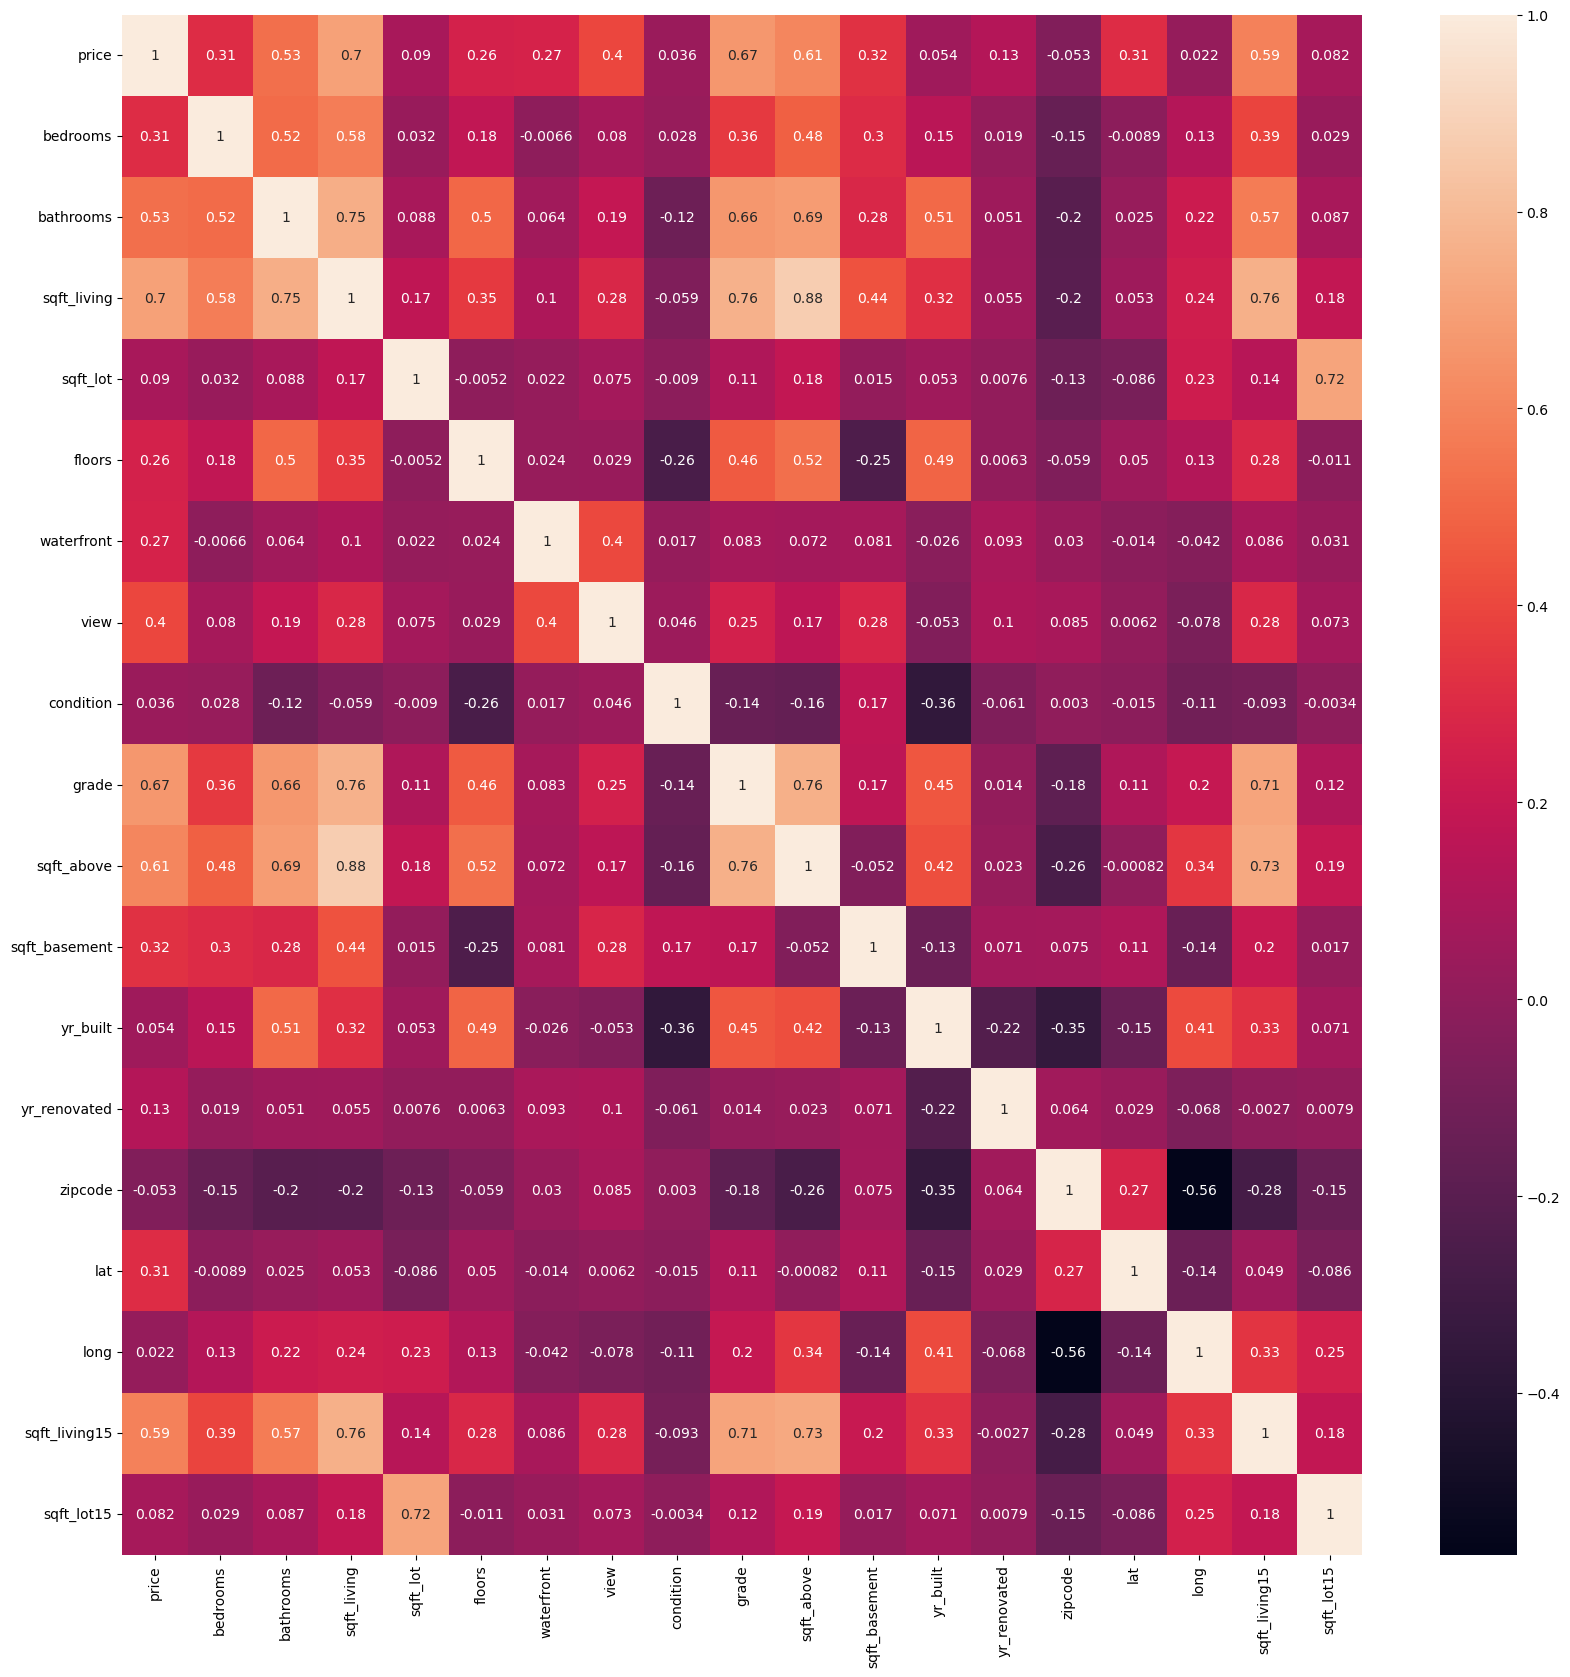

In [82]:

plt.figure(figsize=(20,20))
sns.heatmap(df_kor.corr(),annot=True)
plt.show()

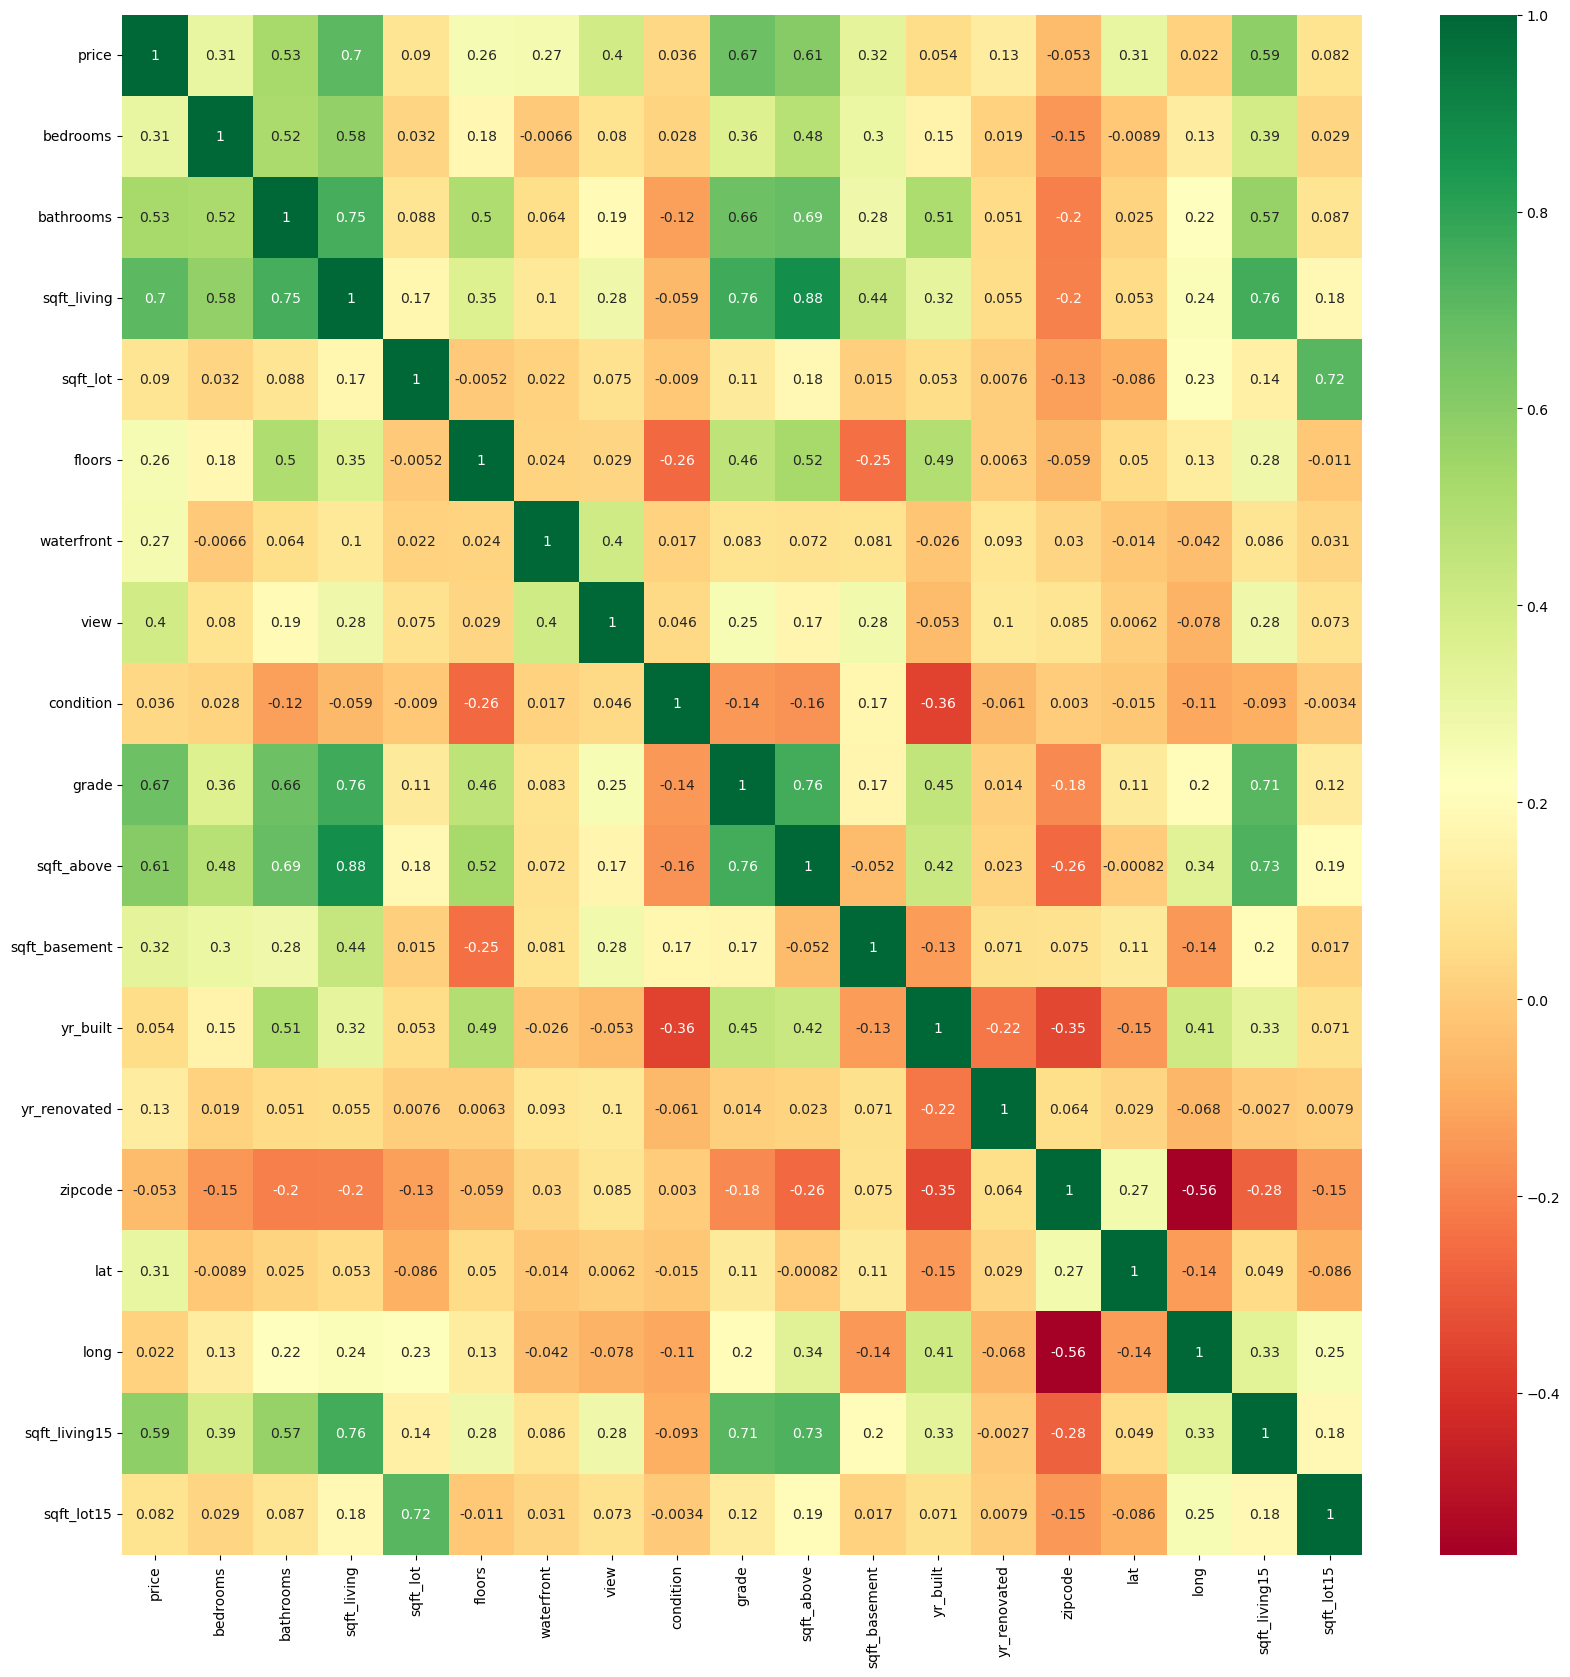

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(df_kor.corr(),annot=True,cmap='RdYlGn'
)
plt.show()

In [84]:
abs(df_kor.corr()['price']).sort_values(ascending=False) # abs mutlak değeri alır

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
Name: price, dtype: float64

In [85]:
df['bathrooms'].std()

0.7701631572177287

In [125]:
df_bedrooms_outliers = df2[df2['bedrooms'] > (df2['bedrooms'].mean() + 3 * df2['bedrooms'].std())]## aykırı değerleri bulma


In [87]:
##df_bedrooms_outliers=df2[df2['bedrooms']]>(df2['bedrooms'].mean()+3*df2['bedrooms'].std()) hata

In [126]:
len(df_bedrooms_outliers)

62

<Axes: ylabel='bedrooms'>

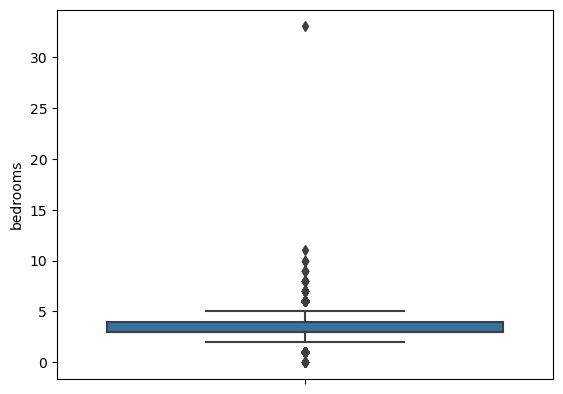

In [127]:
sns.boxplot(y=df2['bedrooms'] )

In [128]:
outliers=df_kor.quantile(.97) ##yüzde 97'lik quantile değerlerini hesaplar. 
##Yüzde 97'lik quantile, veri kümesinin en üst %97'lik kısmını temsil eder. 
##Bu, veri kümesinin en yüksek %3'ünü atıp, geriye kalan %97'sini koruyarak aykırı değerlerin tespitinde bir yöntem olabilir

In [129]:
outliers

price            1.388000e+06
bedrooms         5.000000e+00
bathrooms        3.500000e+00
sqft_living      4.140000e+03
sqft_lot         6.743684e+04
floors           2.500000e+00
waterfront       0.000000e+00
view             3.000000e+00
condition        5.000000e+00
grade            1.000000e+01
sqft_above       3.700000e+03
sqft_basement    1.340000e+03
yr_built         2.013000e+03
yr_renovated     1.989000e+03
zipcode          9.818800e+04
lat              4.776206e+01
long            -1.219040e+02
sqft_living15    3.560000e+03
sqft_lot15       5.140000e+04
Name: 0.97, dtype: float64

In [130]:
df3=df2[df2['price']<outliers['price']]

In [131]:
len(df3)

20960

In [132]:
df3['price'].max()

1387800.0

In [133]:
df3[df3['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [134]:
df4=df3[df3['bedrooms']<outliers['bedrooms']]

In [135]:
df4['bedrooms'].max()

4

In [136]:
df4['price'].max()

1387800.0

In [137]:
df5=df4[df4['sqft_living']<outliers['sqft_living']]

In [138]:
df6=df5[df5['bathrooms']<outliers['bathrooms']]

In [139]:
df6.shape

(18519, 21)

<Axes: xlabel='price', ylabel='Count'>

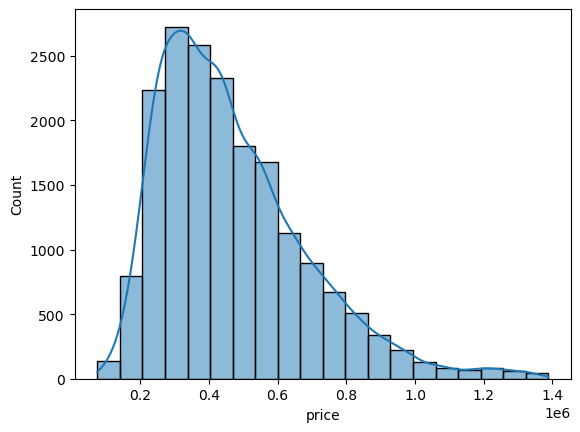

In [140]:
sns.histplot(x=df6['price'],bins=20,kde=True) #bins 20li grup halimnde alıyor kde ise cizgili

In [141]:
df6['price'].min()

75000.0

In [147]:
df6.shape

(18519, 21)

In [148]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18519 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18519 non-null  int64  
 1   date           18519 non-null  object 
 2   price          18519 non-null  float64
 3   bedrooms       18519 non-null  int64  
 4   bathrooms      18519 non-null  float64
 5   sqft_living    18519 non-null  int64  
 6   sqft_lot       18519 non-null  int64  
 7   floors         18519 non-null  float64
 8   waterfront     18519 non-null  int64  
 9   view           18519 non-null  int64  
 10  condition      18519 non-null  int64  
 11  grade          18519 non-null  int64  
 12  sqft_above     18519 non-null  int64  
 13  sqft_basement  18519 non-null  int64  
 14  yr_built       18519 non-null  int64  
 15  yr_renovated   18519 non-null  int64  
 16  zipcode        18519 non-null  int64  
 17  lat            18519 non-null  float64
 18  long       

In [149]:
##df_kor.info()

In [150]:
#df_kor.shape

In [152]:
import datetime
import numpy as np

In [155]:
df6['zipcode']=df6['zipcode'].astype('category')

In [156]:
df6['zipcode'].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False)

In [159]:
df6['zipcode'].unique()

[98178, 98125, 98028, 98136, 98074, ..., 98005, 98072, 98014, 98055, 98039]
Length: 70
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [158]:
df6['zipcode'].nunique() ##farklı bölge ve kategorileri gösterme

70

In [160]:
df6['bedrooms']=df6['bedrooms']**2

In [163]:
df6['bedrooms'].max()


16

In [164]:
df6['bathrooms']=df6['bathrooms']**2

In [168]:
df6['bathrooms'].max()

10.5625

In [169]:
df6['sqft_living']=df6['sqft_living']**2

In [173]:
df6['age']=datetime.datetime.now().year-df6['yr_built']
##  veritabanı 2015 yılına kadarolduğu dikkate alınmalı

In [ ]:
##df6['age']=2015-df6['yr_built'] noteboku acıp calıştıktan sonra calıştır


In [176]:
##df6['age']=df6['age']-9 bi defa tek yaptık

In [179]:
df6['age'].min()

0

In [175]:
df6['age'].describe()

count    18519.000000
mean        54.075166
std         29.075607
min          9.000000
25%         30.000000
50%         51.000000
75%         74.000000
max        124.000000
Name: age, dtype: float64

In [180]:
df6['yr_renovated']=np.where(df6['yr_renovated']==0,0,1) ##0 eşitse 0 yaz değilse 1 yaz

In [181]:
df6['yr_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 18519, dtype: int32

In [182]:
df6.shape

(18519, 22)

In [184]:
df6['sqft_basement']=np.where(df6['sqft_basement']==0,0,1) ##0 eşitse 0 yaz değilse 1 yaz

In [185]:
y=df6['price']

In [187]:
##df6.iloc[1:3], ##df6.iloc[:,1:3] ,##df6.iloc[:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,...,2170,1,1951,1,98125,47.7210,-122.319,1690,7639,64
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82


In [189]:
X=df6.drop(['price','date','id','lat','long'] ,axis=1)

In [190]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,64
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,50
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28


In [191]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [ ]:
#dummies "Dummies", kategorik verileri sayısal formata dönüştürmek için kullanılan bir terimdir. 
#Bu dönüşüm genellikle "one-hot encoding" adı verilen bir yöntemle yapılır. 
#Her bir kategori değeri için ayrı bir sütun oluşturulur ve veri noktasının bu kategoriye ait 
#olup olmadığını belirten 0 veya 1 değerleri bu sütunlara yerleştirilir. 

In [192]:
X=pd.get_dummies(X,columns=['zipcode'],drop_first=True) #dropfirst true kısmı

In [193]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,...,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,...,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,...,False,False,False,False,False,False,False,False,False,False
21609,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,...,True,False,False,False,False,False,False,False,False,False
21610,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,...,False,False,False,False,False,False,False,False,False,False
21611,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,...,False,False,False,False,False,False,False,False,False,False


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODELLİNG

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Daha sonraki işlemler buraya eklenecek





In [200]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
# defined Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [202]:
def modelling(model, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Training Model
        model.fit(X_train, y_train)
        # predict test data
        predictions = model.predict(X_test)
        # Calculation of Metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        # save results
        results[name] = (mse, rmse, r2)
        # Sonuçları yazdırma
    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")
        print("-" * 50)
    # BEST MODEL
    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")

In [203]:
modelling(models, X_train_scaled, y_train, X_test_scaled, y_test)

Linear Regression: Average RMSE: 87443.19
Linear Regression: R2: 0.83
--------------------------------------------------
Decision Tree: Average RMSE: 136094.86
Decision Tree: R2: 0.59
--------------------------------------------------
Ridge: Average RMSE: 87443.66
Ridge: R2: 0.83
--------------------------------------------------
Lasso: Average RMSE: 87443.40
Lasso: R2: 0.83
--------------------------------------------------
ElasticNet: Average RMSE: 99526.45
ElasticNet: R2: 0.78
--------------------------------------------------

Best Performing Model: Linear Regression with Average RMSE: 87443.19 and R2: 0.83
